In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed
from keras.optimizers import Adam
from keras.layers.recurrent import LSTM

import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook 

Using Theano backend.
Using gpu device 0: GeForce GTX 960 (CNMeM is disabled, cuDNN 4007)


In [2]:
feature_length = 32
seq_length = 80
inteval = 0.1

# RNN model using LSTM
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_dim=feature_length))
model.add(TimeDistributed(Dense(feature_length)))
#model.add(Activation('tanh'))
model.compile(loss='mean_squared_error', optimizer=Adam())

In [3]:
# generate data based on f
def gen_train_data(f, data_range, feature_len, seq_len):
    x = numpy.arange(*data_range)
    y = f(x) 
    s = feature_len // 2
    nb_samples = (len(y) - feature_len - s) // seq_len
    X = numpy.zeros((nb_samples, seq_len, feature_len))
    Y = numpy.zeros((nb_samples, seq_len, feature_len))
    for i in range(nb_samples):
        for j in range(seq_len//s):
            X[i,j] = y[i*seq_len+j*s:i*seq_len+j*s+feature_len]
            # predict next s element
            Y[i,j] = y[i*seq_len+j*s+s:i*seq_len+j*s+feature_len+s]
    return X, Y


In [4]:
# training
# simple function
#f =  lambda x: numpy.sin(x)
f = lambda x: numpy.sin(x) *  x ** 0.1
data_range = (0, 200, inteval)
X_train, Y_train = gen_train_data(f, data_range, feature_length, seq_length)

# train model
model.fit(X_train, Y_train, nb_epoch=500, batch_size=32)




Epoch 1/500
24/24 [==============================] - 0s - loss: 0.0335
Epoch 2/500
24/24 [==============================] - 0s - loss: 0.0312
Epoch 3/500
24/24 [==============================] - 0s - loss: 0.0290
Epoch 4/500
24/24 [==============================] - 0s - loss: 0.0270
Epoch 5/500
24/24 [==============================] - 0s - loss: 0.0250
Epoch 6/500
24/24 [==============================] - 0s - loss: 0.0232
Epoch 7/500
24/24 [==============================] - 0s - loss: 0.0214
Epoch 8/500
24/24 [==============================] - 0s - loss: 0.0196
Epoch 9/500
24/24 [==============================] - 0s - loss: 0.0180
Epoch 10/500
24/24 [==============================] - 0s - loss: 0.0163
Epoch 11/500
24/24 [==============================] - 0s - loss: 0.0147
Epoch 12/500
24/24 [==============================] - 0s - loss: 0.0132
Epoch 13/500
24/24 [==============================] - 0s - loss: 0.0118
Epoch 14/500
24/24 [==============================] - 0s - loss: 0.0104
E

<IPython.core.display.Javascript object>


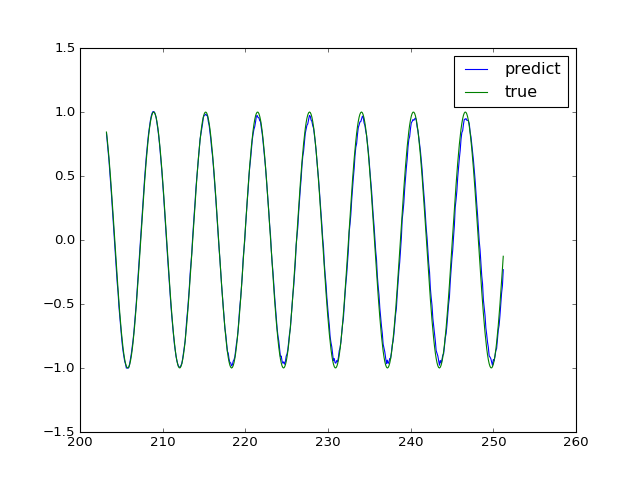

In [5]:
#Z = model.predict(numpy.asarray(X_train[0])[None,:])
#print(numpy.sqrt(numpy.mean((Z.flatten() - Y_train[0].flatten())**2)))

s = feature_length // 2
test_num = 30

# test
start_pos = 200
test_range = numpy.linspace(start_pos, start_pos + inteval * feature_length, feature_length)
X_test = numpy.asarray(f(test_range)).T[None, None, :]
predict_range = numpy.linspace(start_pos + inteval * feature_length, 
                               start_pos + inteval * feature_length + inteval * s * test_num, s * test_num)
Y_test = f(predict_range)

pre_x = X_test
X_predict = []
X_true = []
for i in range(test_num):
    Z = model.predict(X_test)
    pre_x = numpy.hstack((pre_x[0,0,s:], Z[0,-1,s:]))[None, None, :]
    X_test = numpy.hstack((X_test, pre_x))
    Z = Z.flatten()
    X_predict = numpy.hstack((X_predict, Z[-s:]))

plt.plot(predict_range, X_predict, label='predict')
plt.plot(predict_range, Y_test, label='true')
#plt.ylim([-1, 1])
plt.legend()


